## This file just compares the accuracy and loss 
## the same model in Tensorflow and Flux

In [1]:
using PyCall
using BSON 
@pyimport pickle

function unpickle(filename)
    r = nothing
    @pywith pybuiltin("open")(filename,"rb") as f begin
        r = pickle.load(f)
    end
    return r
end

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall C:\Users\Zubu\.julia\packages\PyCall\ttONZ\src\PyCall.jl:407


unpickle (generic function with 1 method)

In [30]:
fluxhistory=BSON.load("juliahistory.bson")
flux_acc=fluxhistory[:history][2]
flux_loss=fluxhistory[:history][1]

kerashistory=unpickle("history.pickle")
keras_loss=float.(kerashistory[1])
keras_acc=float.(kerashistory[2])


600-element Array{Float64,1}:
 0.0020000000949949026
 0.09600000083446503  
 0.19200000166893005  
 0.2434999942779541   
 0.295199990272522    
 0.33500000834465027  
 0.3677142858505249   
 0.3919999897480011   
 0.4117777645587921   
 0.4262000024318695   
 0.4447272717952728   
 0.4598333239555359   
 0.4772307574748993   
 ⋮                    
 0.8465321063995361   
 0.8464909195899963   
 0.8461441397666931   
 0.8460536003112793   
 0.8461061716079712   
 0.8463508486747742   
 0.8458260893821716   
 0.8457931280136108   
 0.8456068634986877   
 0.8454067707061768   
 0.8449580073356628   
 0.8449333310127258   

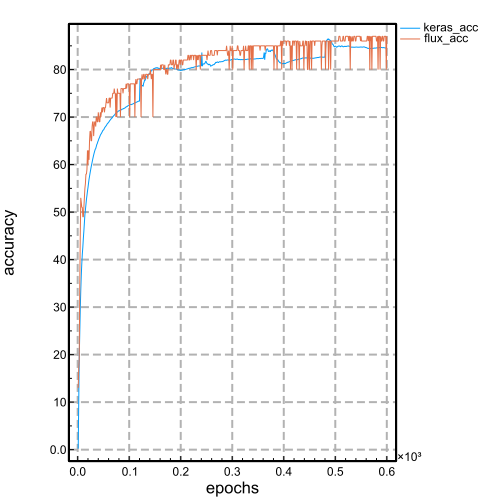

In [33]:
# Im not sure what caused these dips
using Plots
inspectdr()
plot( 1:600, [keras_acc .*100, flux_acc .* 100, ],xlabel="epochs",ylabel="accuracy", label=[ "keras_acc" "flux_acc"],size = (500, 500))

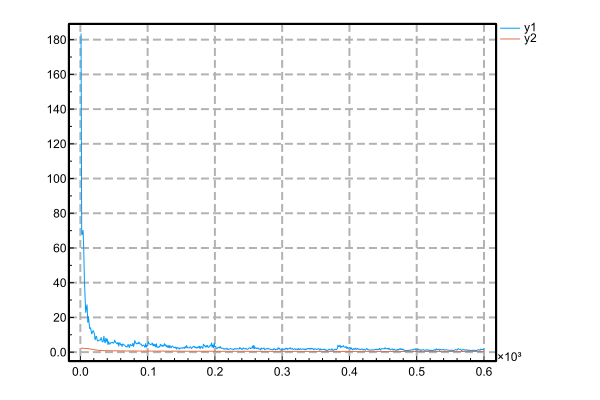

In [34]:
# Loss of keras and loss of flux are on a very diffrent scale
# this is not very helpful
plot( 1:600, [keras_loss, flux_loss])#, xlabel="epochs",ylabel="loss", label=[ "keras_loss" "flux_loss"],size = (400, 400))